<a href="https://colab.research.google.com/github/gabrielborja/fCC_certifications/blob/main/fCC_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Python certification

## [Link to Certication](https://www.freecodecamp.org/certification/gabrielborja/data-analysis-with-python-v7)

## 2 Demographic Data Analyzer

In [ ]:
#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving adult.data.csv to adult.data.csv


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['adult.data.csv']), delimiter=',')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#Checking dataframe head
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)
race_count = df['race'].value_counts()
race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [ ]:
#What is the average age of men?
average_age_men = round(df[df['sex'] == 'Male']['age'].mean(), 1)
average_age_men

39.4

In [ ]:
# What is the percentage of people who have a Bachelor's degree?
#percentage_bachelors = round(((df[df['education'] == 'Bachelors']['education'].count()) / len(df['education']))*100, 1)
percentage_bachelors = round((df['education'].value_counts(normalize=True).loc['Bachelors'])*100, 1)
percentage_bachelors

16.4

In [ ]:
# What percentage of people with advanced education ['Bachelors', 'Masters', 'Doctorate'] make more than 50K?
# What percentage of people without advanced education make more than 50K?

higher_education = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][['education', 'salary']].reset_index()
lower_education = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])][['education', 'salary']].reset_index()

# with and without ['Bachelors', 'Masters', 'Doctorate'] and percentage with salary >50K

higher_education_rich = round((higher_education[higher_education['salary'] == '>50K']['education'].count() / higher_education['education'].count())*100, 1)
lower_education_rich = round((lower_education[lower_education['salary'] == '>50K']['education'].count() / lower_education['education'].count())*100, 1)

higher_education_rich, lower_education_rich

(46.5, 17.4)

In [ ]:
# What is the minimum number of hours a person works per week (hours-per-week feature)?
min_work_hours = df['hours-per-week'].min()
min_work_hours

1

In [ ]:
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
num_min_workers = df[df['hours-per-week'].isin([min_work_hours])][['hours-per-week', 'salary']]
rich_percentage = round((num_min_workers[num_min_workers['salary'].isin(['>50K'])]['hours-per-week'].count() / num_min_workers['hours-per-week'].count())*100, 1)
rich_percentage

10.0

In [ ]:
# What country has the highest percentage of people that earn >50K?
countries = df[df['salary'].isin(['>50K'])]['native-country'].value_counts()
hp_df = round((countries/ df['native-country'].value_counts())*100, 1).sort_values(ascending=False)

highest_earning_country =  hp_df.index[0] #==> select the first index to get the top country
highest_earning_country_percentage = hp_df[0] #==> select the first entry to get the highest percentage

highest_earning_country, highest_earning_country_percentage

('Iran', 41.9)

In [ ]:
# Identify the most popular occupation for those who earn >50K in India.
india_rich = df[df['native-country'].isin(['India']) & df['salary'].isin(['>50K'])][['occupation', 'native-country', 'salary']].reset_index()
india_by_occ = india_rich['occupation'].value_counts().sort_values(ascending=False)
top_IN_occupation = india_by_occ.index[0] #==> select the first index to get the top occupation
top_IN_occupation

'Prof-specialty'

In [ ]:
#India by occupation earning >50K
india_by_occ

Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Adm-clerical         1
Transport-moving     1
Sales                1
Name: occupation, dtype: int64

## 3 Medical Data Visualizer

Assignment
In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

In [ ]:
#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Remove previous versions of uploaded file
!rm medical_examination.csv

rm: cannot remove 'medical_examination.csv': No such file or directory


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded_2['medical_examination.csv']), delimiter=',')

In [ ]:
#Checking the dataframe head
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#Checking the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
#Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by 
#dividing their weight in kilograms by the square of their height in meters.
df = df.assign(bmi = lambda x: x['weight']/(np.square(x['height']/100)))

In [ ]:
#If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
df = df.assign(overweight = lambda o: np.where(o['bmi'] > 25, 1, 0))
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,37.729725,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,29.983588,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,28.440955,1
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,25.282570,1


In [ ]:
#Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1,
#make the value 0. If the value is more than 1, make the value 1.
df = df.assign(cholesterol = np.where(df['cholesterol']==1, 0, 1), gluc = np.where(df['gluc']==1, 0, 1))
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,29.384676,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,37.729725,1
7,12,22584,2,178,95.0,130,90,1,1,0,0,1,1,29.983588,1
8,13,17668,1,158,71.0,110,70,0,0,0,0,1,0,28.440955,1
9,14,19834,1,164,68.0,110,60,0,0,0,0,0,0,25.282570,1


In [ ]:
df['cholesterol'].value_counts()
#df['gluc'].value_counts()
#df.info()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [ ]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat.head(10)

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
5,0,active,0
6,0,active,1
7,1,active,1
8,0,active,1
9,0,active,0


In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420000 entries, 0 to 419999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   cardio    420000 non-null  int64 
 1   variable  420000 non-null  object
 2   value     420000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.6+ MB


In [ ]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat_grouped = df_cat.groupby(['cardio', 'variable']).agg(total=('value', 'value_counts')).reset_index()
df_cat_grouped

,cardio,variable,value,total
0,0,active,1,28643
1,0,active,0,6378
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,1,19106
9,0,overweight,0,15915


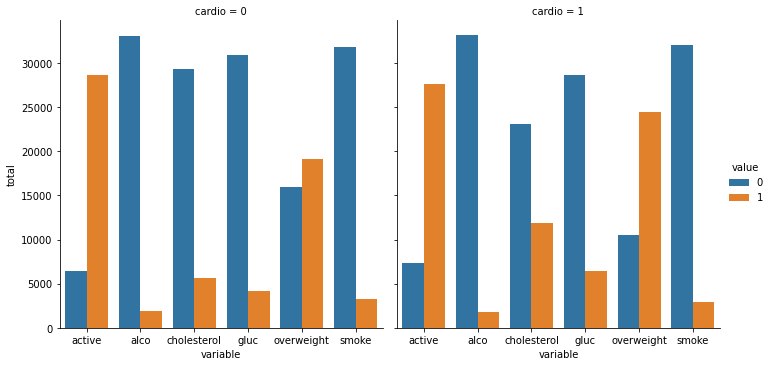

In [ ]:
#Create a chart that shows the value counts of the categorical features using seaborn's catplot().
#The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.
g = sns.catplot(x='variable', y='total', hue='value', data=df_cat_grouped, col='cardio', kind='bar')
plt.show()

#fig = g.fig
# Do not modify the next two lines
#fig.savefig('catplot.png')

In [ ]:
#Clean the data. Filter out the following patient segments that represent incorrect data:
df_heat = df.copy().drop(columns='bmi') #==> make a copy of the dataframe and drop the bmi column

df_heat = df_heat[(df_heat['ap_lo'] <= df_heat['ap_hi']) & #==> diastolic pressure is higher than systolic
                  (df_heat['height'] >= df_heat['height'].quantile(0.025)) & #==> height is less than the 2.5th percentile
                  (df_heat['height'] <= df_heat['height'].quantile(0.975)) & #==> height is more than the 97.5th percentile
                  (df_heat['weight'] >= df_heat['weight'].quantile(0.025)) & #==> weight is less than the 2.5th percentil
                  (df_heat['weight'] <= df_heat['weight'].quantile(0.975))] #==> weight is more than the 97.5th percentile
df_heat.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,1,1,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,0,0,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,0,0,0,0,0,0,1


In [ ]:
df_heat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63259 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           63259 non-null  int64  
 1   age          63259 non-null  int64  
 2   gender       63259 non-null  int64  
 3   height       63259 non-null  int64  
 4   weight       63259 non-null  float64
 5   ap_hi        63259 non-null  int64  
 6   ap_lo        63259 non-null  int64  
 7   cholesterol  63259 non-null  int64  
 8   gluc         63259 non-null  int64  
 9   smoke        63259 non-null  int64  
 10  alco         63259 non-null  int64  
 11  active       63259 non-null  int64  
 12  cardio       63259 non-null  int64  
 13  overweight   63259 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.2 MB


In [ ]:
# Calculate the correlation matrix
corr = df_heat.corr() #==> method='pearson'

In [ ]:
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

In [ ]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

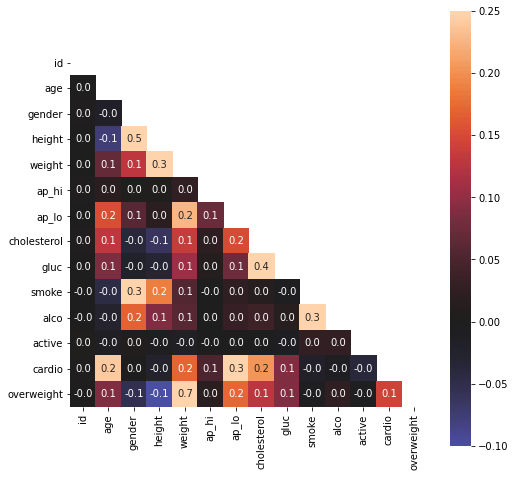

In [ ]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap with 'sns.heatmap()' #cbar_kws={'shrink': .45, 'format': '%.2f'}
ax = sns.heatmap(data=corr, vmin=-0.1, vmax=0.25, center=0, annot=True, fmt='.1f', square=True, mask=mask) #==> use vmin and vmax to match fCC colormap scale
plt.show()

In [ ]:
#expected = ['0.0',
#            '0.0', '-0.0', 
#            '0.0', '-0.1', '0.5',
#            '0.0', '0.1', '0.1', '0.3',
#            '0.0', '0.0', '0.0', '0.0', '0.0',
#            '0.0', '0.2', '0.1', '0.0', '0.2', '0.1',
#            '0.0', '0.1', '-0.0', '-0.1', '0.1', '0.0', '0.2', ==> OK
#            '0.0', '0.1', '-0.0', '-0.0', '0.1', '0.0', '0.1', '0.4',
#            '-0.0', '-0.0', '0.3', '0.2', '0.1', '-0.0', '0.0', '0.0', '-0.0',
#            '-0.0', '-0.0', '0.2', '0.1', '0.1', '0.0', '0.0', '0.0', '0.0', '0.3',
#            '0.0', '-0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.0', '0.0', '-0.0', '0.0','0.0',
#            '0.0', '0.2', '0.0', '-0.0', '0.2', '0.1', '0.3', '0.2', '0.1', '-0.0', '-0.0', '-0.0',
#            '-0.0', '0.1', '-0.1', '-0.1', '0.7', '0.0', '0.2', '0.1', '0.1', '-0.0', '0.0', '-0.0', '0.1']

expected = ['0.0', '0.0', '-0.0', '0.0', '-0.1', '0.5', '0.0', '0.1', '0.1', '0.3', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.2', '0.1', '0.0', '0.2', '0.1', '0.0', '0.1', '-0.0', '-0.1', '0.1', '0.0', '0.2', '0.0', '0.1', '-0.0', '-0.0', '0.1', '0.0', '0.1', '0.4', '-0.0', '-0.0', '0.3', '0.2', '0.1', '-0.0', '0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.2', '0.1', '0.1', '0.0', '0.0', '0.0', '0.0', '0.3', '0.0', '-0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.0', '0.0', '-0.0', '0.0', '0.0', '0.0', '0.2', '0.0', '-0.0', '0.2', '0.1', '0.3', '0.2', '0.1', '-0.0', '-0.0', '-0.0', '-0.0', '0.1', '-0.1', '-0.1', '0.7', '0.0', '0.2', '0.1', '0.1', '-0.0', '0.0', '-0.0', '0.1']

In [ ]:
len(expected)

91

In [ ]:
expected[81]

'-0.1'

## 4 Page view time series *visualizer*

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth

In [ ]:
#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Remove previous versions of uploaded file
!rm fcc-forum-pageviews.csv

In [ ]:
#Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
#Uploading file from local drive
from google.colab import files
uploaded_3 = files.upload()

Saving fcc-forum-pageviews.csv to fcc-forum-pageviews.csv


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded_3['fcc-forum-pageviews.csv']), parse_dates=True, index_col='date') #==> parsing dates and setting first column as index

In [ ]:
#Checking the dataframe head #==>df.index[:5]
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [ ]:
#Checking the dataframe shape
df.shape

(1304, 1)

In [ ]:
#Checking the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [ ]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


In [ ]:
#Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".
#The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019".
#The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

def draw_line_plot():
  fig, ax = plt.subplots(figsize=(18, 4)) #=>=nrows=1, ncols=1, 
  ax.plot(df.index, df['value'])
  plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
  plt.xlabel('Date'), plt.ylabel('Page Views')
  return fig

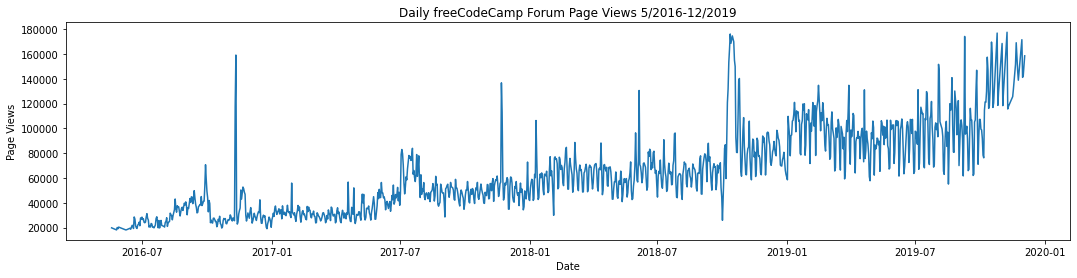

In [ ]:
#Creating a line chart to visualize the forum pages views versus time
draw_line_plot()
plt.show()

In [ ]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views
#for each month grouped by year.

df_bar = df.copy()
df_bar = df_bar.groupby(by=[df_bar.index.year, df_bar.index.month_name()], sort=False).mean() #==> important: sort=False so month names don't shuffle
df_bar.index.names = ['year', 'month'] #==> rename index
df_bar

value
year month                   
2016 May         19432.400000
     June        21875.105263
     July        24109.678571
     August      31049.193548
     September   41476.866667
     October     27398.322581
     November    40448.633333
     December    27832.419355
2017 January     32785.161290
     February    31113.071429
     March       29369.096774
     April       30878.733333
     May         34244.290323
     June        43577.500000
     July        65806.838710
     August      47712.451613
     September   47376.800000
     October     47438.709677
     November    57701.566667
     December    48420.580645
2018 January     58580.096774
     February    65679.000000
     March       62693.774194
     April       62350.833333
     May         56562.870968
     June        70117.000000
     July        63591.064516
     August      62831.612903
     September   65941.733333
     October    111378.142857
     November    78688.333333
     December    80047.483871
2019 January    102056.516129
     February   105968.357143
     March       91214.483871
     April       89368.433333
     May         91439.903226
     June        90435.642857
     July        97236.566667
     August     102717.310345
     September   97268.833333
     October    122802.272727
     November   143166.428571
     December   150733.500000

In [ ]:
#Get unique labels for the month column
unique_months = list(df_bar.loc[(2017)].index) #==>locate year and extract the sliced index
unique_months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [ ]:
#Reset index to extract year and month to columns for easy plotting
df_bar = df_bar.reset_index()
df_bar.head()

,year,month,value
0,2016,May,19432.400000
1,2016,June,21875.105263
2,2016,July,24109.678571
3,2016,August,31049.193548
4,2016,September,41476.866667


In [ ]:
#The legend should show month labels and have a title of "Months". On the chart, the label on
#the x axis should be "Years" and the label on the y axis should be "Average Page Views".

def draw_bar_plot():
  
  #Create 1 subplot and unpack the output figure and axe
  fig, ax = plt.subplots(figsize=(8, 8)) #=>=nrows=1, ncols=1,

  #Creating a new figure with seaborn
  sns.barplot(x='year', y='value', hue='month', data=df_bar, hue_order=unique_months, palette='tab10', ax=ax)
  
  #Setting labels and legend
  ax.set_xlabel('Years')
  ax.set_ylabel('Average Page Views')
    
  #Reset the legend to upper left
  ax.legend(loc='upper left')

  return fig

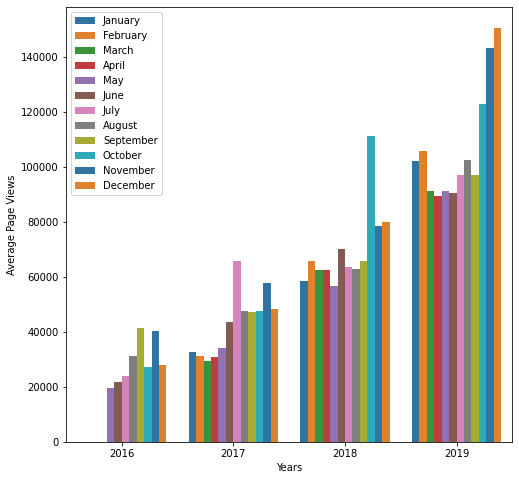

In [ ]:
#Call the function and plot the Average Page Views by Year and Month
draw_bar_plot()
plt.show()

In [ ]:
#list(df_bar.index.get_level_values('year'))))
#print(len(list(df_bar.index.get_level_values('month'))))


44
44


In [ ]:
#Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [ ]:
#Get unique labels for the month column
ord_months = [month[:3] for month in unique_months] #==> from unique months slice first 3 characters
ord_months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [ ]:
#Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png".
#These box plots should show how the values are distributed within a given year or month and how it compares over time.
#The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart
#should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and y axis are labeled correctly.

def draw_box_plot():
    
  #Create two subplots and unpack the output array immediately
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8)) #==> ax1 and ax2 tuple unpacking is general convention used for multiple Axes

  #Accessing axes objects and plotting
  sns.boxplot(x='year', y='value', data=df_box, palette='tab10', ax=ax1)
  sns.boxplot(x='month', y='value', data=df_box, order=ord_months, ax=ax2)

  #Customizing axes labels and titles for first axes figure
  ax1.set_xlabel('Year')
  ax1.set_ylabel('Page Views')
  ax1.set_title('Year-wise Box Plot (Trend)')

  #Customizing axes labels and titles for second axes figure
  ax2.set_xlabel('Month')
  ax2.set_ylabel('Page Views')
  ax2.set_title('Month-wise Box Plot (Seasonality)')

  #Prevent from axis to colliding or overlaping one another.
  #plt.tight_layout()

  return fig

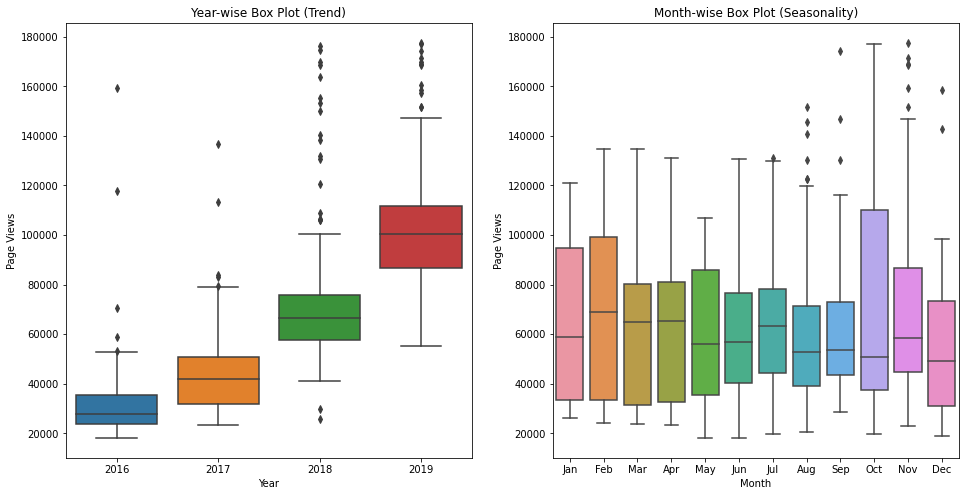

In [ ]:
#Call the function and plot the Average Page Views by Year and Month
draw_box_plot()
plt.show()

## 5 Sea Level Predictor

You will anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

In [ ]:
#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
#Remove previous versions of uploaded file
!rm epa-sea-level.csv

In [ ]:
#Use Pandas to import the data from "epa-sea-level.csv".
from google.colab import files
uploaded_4 = files.upload()

Saving epa-sea-level.csv to epa-sea-level.csv


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded_4['epa-sea-level.csv']), parse_dates=True)

In [ ]:
#Checking the dataframe head
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [ ]:
#Checking the dataframe shape
df.shape

(134, 5)

In [ ]:
#Checking the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

In [ ]:
#Create a function to predict level change through year 2050
def draw_plot():
  
  #Create arrays for plotting
  x = np.array(df['Year'])
  y = np.array(df['CSIRO Adjusted Sea Level'])
  
  #Create scatter plot
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
  ax.scatter(x, y, label='scatter')
  
  #Create first line of best fit
  x_50 = np.arange(df['Year'].min(), 2050)
  lreg_1 = linregress(x, y)
  ax.plot(x_50, lreg_1.slope*x_50 + lreg_1.intercept, 'r' , label='fitted-line-1880-2050')

  #Create second line of best fit
  df_2000 = np.array(df[df['Year'] >= 2000][['Year', 'CSIRO Adjusted Sea Level']].copy())
  x_2000, y_2000 = [[x for x, y in df_2000], [y for x, y in df_2000]] 
  x_00_50 = np.arange(2000, 2050)
  lreg_2 = linregress(x_2000, y_2000)
  ax.plot(x_00_50, lreg_2.slope*x_00_50 + lreg_2.intercept, 'm--', label='fitted-line-2000-2050')

  #Add labels and title
  ax.set_title('Rise in Sea Level')
  ax.set_xlabel('Year')
  ax.set_ylabel('Sea Level (inches)')
  ax.legend()

  return fig

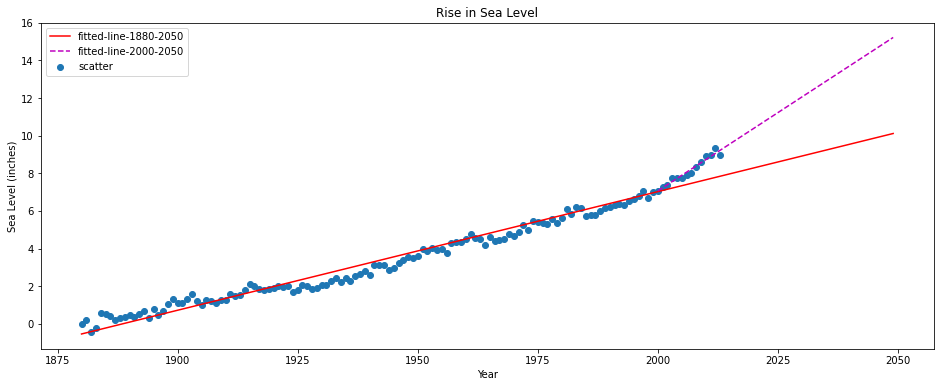

In [ ]:
#Call the function and draw the scatter plot to predict sea level
draw_plot()
plt.show()

In [ ]:
#x = np.array(df['Year'])
#int(np.argwhere(x == 2000))
x[int(np.argwhere(x == 2000)) : ]

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013])

In [ ]:
#New slice
df_2000 = np.array(df[df['Year'] >= 2000][['Year', 'CSIRO Adjusted Sea Level']])
x_2000, y_2000 = [[x for x, y in df_2000], [y for x, y in df_2000]]

In [ ]:
x_2000, y_2000